# Video Game Sales
---

This dataset contains a list of video games with sales greater than 100,000 copies. The goal of this notebook is to use traditional ML methods to predict the sales of these games, so it will treated as a regression problem.

In [100]:
## Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import plotly.express as px
import math
warnings.filterwarnings('ignore')

In [101]:
## Importing the dataset
dataset = pd.read_csv('./vgsales.csv')

In [102]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [103]:
dataset.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


We have 3 categorical data features. These featuers are `Platform`, `Genre`, and `Publisher`. These values need to be converted by either label encoding or one hot encoding, but first, we get how many unique values in each column 

In [104]:
print("Platform has: {} unique values. They are {}".format(pd.unique(dataset["Platform"]).shape, 
                                                           [i for i in pd.unique(dataset["Platform"])]))

Platform has: (31,) unique values. They are ['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA', '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC', 'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16', '3DO', 'GG', 'PCFX']


In [105]:
print("Genre has: {} unique values. They are {}".format(pd.unique(dataset["Genre"]).shape, 
                                                           [i for i in pd.unique(dataset["Genre"])]))

Genre has: (12,) unique values. They are ['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc', 'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure', 'Strategy']


In [106]:
print("Publisher has: {} unique values. They are {}".format(pd.unique(dataset["Publisher"]).shape, 
                                                           [i for i in pd.unique(dataset["Publisher"])]))

Publisher has: (579,) unique values. They are ['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive', 'Sony Computer Entertainment', 'Activision', 'Ubisoft', 'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft', 'Atari', '505 Games', 'Capcom', 'GT Interactive', 'Konami Digital Entertainment', 'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts', 'Virgin Interactive', 'Warner Bros. Interactive Entertainment', 'Universal Interactive', 'Eidos Interactive', 'RedOctane', 'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games', 'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive', 'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios', nan, 'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5', 'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver', '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis', 'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment', 'Mindscape', 'Infogrames', 'Unknown', 'Square', 'Valve', '

As we can see, The 3 columns has many many unique values. Thus, we go to label encoding. Although label encoding may not accuracte as our features are not ordinal, We don't use one hot encoding to avoid sparse vectors and possibly multicollinearity

**After some investigation**, it was found that the publisher values contains both floats and strings types which is not correct for categorial data feature. 

In [107]:
publisher_unique_values = pd.unique(dataset["Publisher"])
types_set = set([])
for i in publisher_unique_values:
    types_set.add(type(i))                
    
print("Publisher values are of types:{}".format(types_set))

Publisher values are of types:{<class 'float'>, <class 'str'>}


In [108]:
for i in publisher_unique_values:
    if(type(i) == float):
        print(i)

nan


As expected, publisher has a nan values. That is not a number. So, we drop it 

In [109]:
dataset = dataset.dropna()

Then, we convert our categorical feature to labeled encoded features.

In [110]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

dataset["Platform"]= label_encoder.fit_transform(dataset["Platform"]) 
dataset["Genre"]= label_encoder.fit_transform(dataset["Genre"]) 
dataset["Publisher"]= label_encoder.fit_transform(dataset["Publisher"])

In [112]:
dataset.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,26,2006.0,10,359,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,11,1985.0,4,359,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,26,2008.0,6,359,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,26,2009.0,10,359,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,5,1996.0,7,359,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,5,1989.0,5,359,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,4,2006.0,4,359,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,26,2006.0,3,359,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,26,2009.0,4,359,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,11,1984.0,8,359,26.93,0.63,0.28,0.47,28.31


## Now, we get an overview of the histogram of the dataset

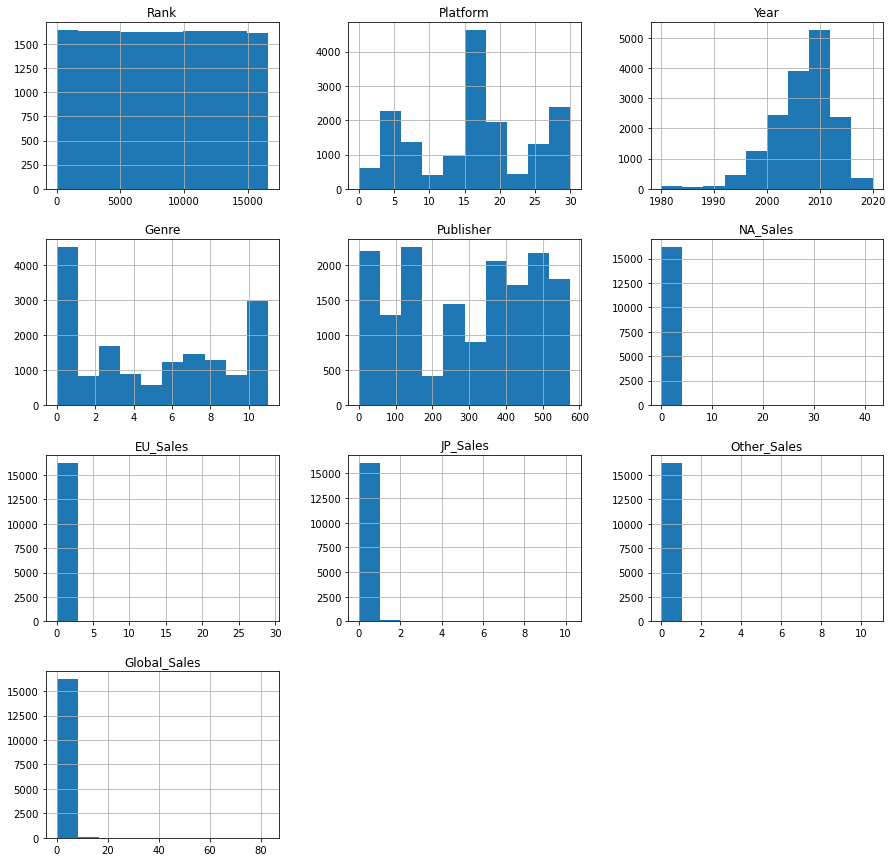

(16291, 11)
Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')


In [113]:
dataset.hist(figsize=(15,15))
plt.show()
print(dataset.shape)
print(dataset.columns)

In [114]:
# Checking for null values in the dataset
dataset.isnull().values.any()

False

In [115]:
## Checking which columns contain null values
print("Rank has any Null values        ?", dataset['Rank'].isnull().values.any())
print("Name has any Null values        ?", dataset['Name'].isnull().values.any())
print("Platform has any Null values    ?", dataset['Platform'].isnull().values.any())
print("Year has any Null values        ?", dataset['Year'].isnull().values.any())
print("Genre has any Null values       ?", dataset['Genre'].isnull().values.any())
print("Publisher has any Null values   ?", dataset['Publisher'].isnull().values.any())
print("NA_Sales has any Null values    ?", dataset['NA_Sales'].isnull().values.any())
print("EU_Sales has any Null values    ?", dataset['EU_Sales'].isnull().values.any())
print("JP_Sales has any Null values    ?", dataset['JP_Sales'].isnull().values.any())
print("Other_Sales has any Null values ?", dataset['Other_Sales'].isnull().values.any())
print("Global_Sales has any Null values?", dataset['Global_Sales'].isnull().values.any())

Rank has any Null values        ? False
Name has any Null values        ? False
Platform has any Null values    ? False
Year has any Null values        ? False
Genre has any Null values       ? False
Publisher has any Null values   ? False
NA_Sales has any Null values    ? False
EU_Sales has any Null values    ? False
JP_Sales has any Null values    ? False
Other_Sales has any Null values ? False
Global_Sales has any Null values? False


We notice that both year and publisher fields have null values. Hence, we remove them.

In [116]:
#Checking the number of missing value rows in the dataset
print("Null year count:", dataset['Year'].isnull().sum())
print("Null publishers count:", dataset['Publisher'].isnull().sum())
print("Max Year Value:", dataset['Year'].max())

Null year count: 0
Null publishers count: 0
Max Year Value: 2020.0


In [117]:
# Removing the missing value rows in the dataset
dataset = dataset.dropna(axis=0, subset=['Year','Publisher'])

In [118]:
dataset.isnull().values.any()

False

#### Note: 

We can search for the null values online to get more accurate results. However, we'll only drop them for now as we need to compare our results with the ones posted at kaggle.

---

Now that we have removed the null values, we check the number of games (rows) and the number of unique publishers, platforms and genres to get an idea of how our the games in the dataset are distributed categorically.

In [119]:
print("Number of games: ", len(dataset))
publishers = dataset['Publisher'].unique()
print("Number of publishers: ", len(publishers))
platforms = dataset['Platform'].unique()
print("Number of platforms: ", len(platforms))
genres = dataset['Genre'].unique()
print("Number of genres: ", len(genres))

Number of games:  16291
Number of publishers:  576
Number of platforms:  31
Number of genres:  12


---

Below we create a simple column chart to represent the total 'Global_Sales' of video games per year. We get our data by data our dataframe of all video games sales, grouping it by 'Year' and then calling .sum() to get totals for each year. This creates a dataframe with our years as the index or row names and the entries our total sales for that year.

In the dataset, the index representing years are floating point numbers eg "2006.0" not "2006". We get our x entries by taking these values as integers.

Once data is ready we simply pass our x and y variables to our Seaborn barplot function. We also set our x-label names, the title and we also rotate our xticklabels and change their fontsize.

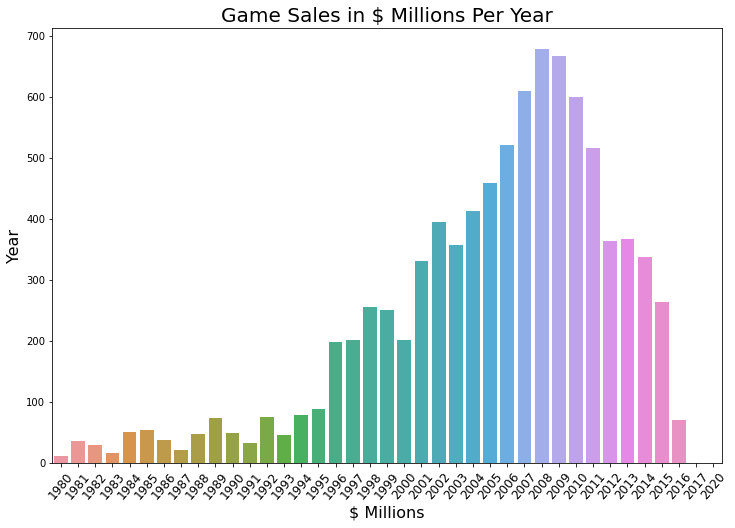

In [120]:
y = dataset.groupby(['Year']).sum()
y = y['Global_Sales']
x = y.index.astype(int)

plt.figure(figsize=(12,8))
ax = sns.barplot(y = y, x = x)
ax.set_xlabel(xlabel='$ Millions', fontsize=16)
ax.set_xticklabels(labels = x, fontsize=12, rotation=50)
ax.set_ylabel(ylabel='Year', fontsize=16)
ax.set_title(label='Game Sales in $ Millions Per Year', fontsize=20)
plt.show()

Here we find an intersting fact. Both 2020 and 2017 have very little sales. Which means that they are probably erroneous. To make sure that our claim is true, we check the game releases in those two years

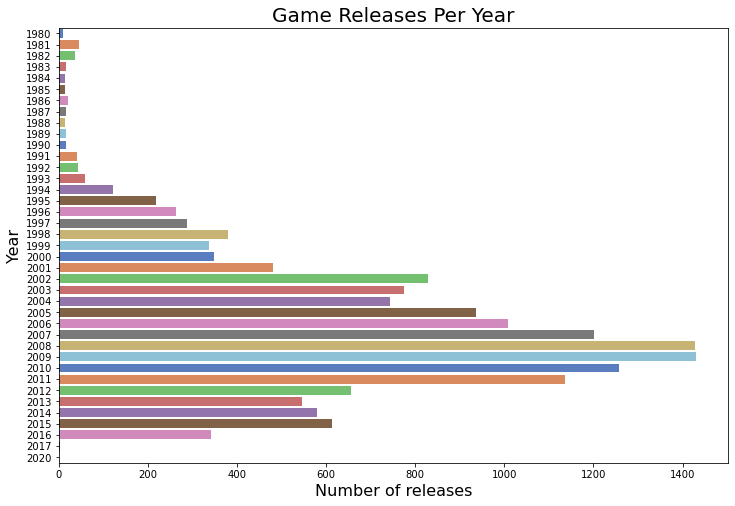

In [121]:
x = dataset.groupby(['Year']).count()
x = x['Global_Sales']
y = x.index.astype(int)

plt.figure(figsize=(12,8))
colors = sns.color_palette("muted")
ax = sns.barplot(y = y, x = x, orient='h', palette=colors)
ax.set_xlabel(xlabel='Number of releases', fontsize=16)
ax.set_ylabel(ylabel='Year', fontsize=16)
ax.set_title(label='Game Releases Per Year', fontsize=20)
plt.show();

As expected, they both have no or very little game releases. Thus, we remove those two fields from our dataset to get a better results

In [122]:
print(y)

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013, 2014, 2015, 2016, 2017, 2020],
           dtype='int64', name='Year')


In [123]:
dataset = dataset[dataset.Year != 2020]
dataset = dataset[dataset.Year != 2017]

# Print Max year now
year_data = dataset['Year']
print("Max Year Value: ", year_data.max())

Max Year Value:  2016.0


We plot again to make sure it's removed correctly.

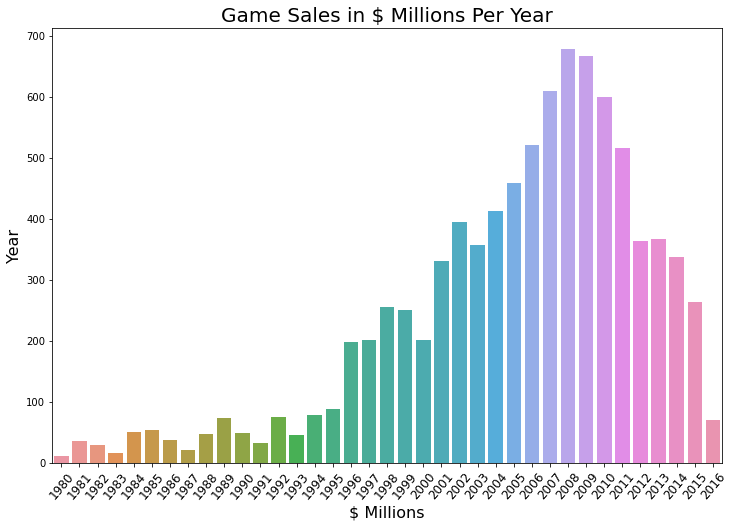

In [124]:
y = dataset.groupby(['Year']).sum()
y = y['Global_Sales']
x = y.index.astype(int)

plt.figure(figsize=(12,8))
ax = sns.barplot(y = y, x = x)
ax.set_xlabel(xlabel='$ Millions', fontsize=16)
ax.set_xticklabels(labels = x, fontsize=12, rotation=50)
ax.set_ylabel(ylabel='Year', fontsize=16)
ax.set_title(label='Game Sales in $ Millions Per Year', fontsize=20)
plt.show()

Below we create a simple column chart to represent the total total number of releases of video games per year, but with a twist, it is oriented horizontally, which means our Year entries, which usually would be our X-axis, are now on the Y-axis and the count of 'Global_Sales' entries, which would usually be on the Y-axis, are now on the X-axis.

The below chart that represents the number of games released each year is constructed in the same way as the above chart, with the only difference being we count the entries per year instead of summing them.

We also introduce the 'palette' parameter of Seaborn's barplot that can be used to personally tune colour schemes but also comes with a large number of preset palettes. See http://seaborn.pydata.org/tutorial/color_palettes.html for a range of choices.

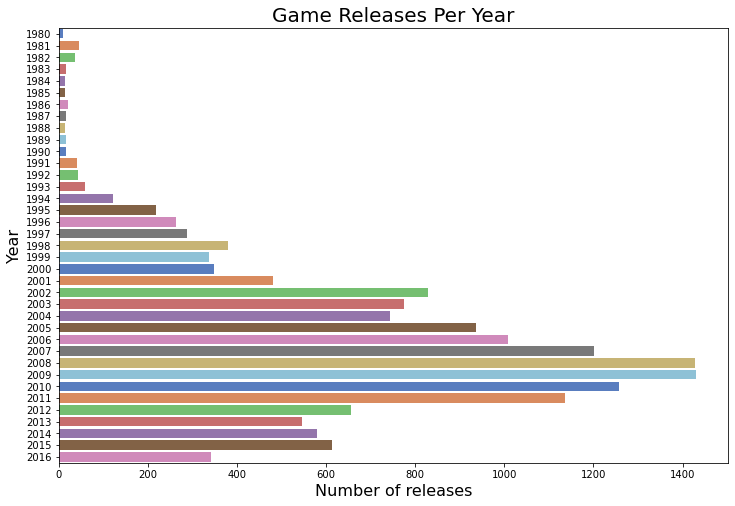

In [125]:
x = dataset.groupby(['Year']).count()
x = x['Global_Sales']
y = x.index.astype(int)

plt.figure(figsize=(12,8))
colors = sns.color_palette("muted")
ax = sns.barplot(y = y, x = x, orient='h', palette=colors)
ax.set_xlabel(xlabel='Number of releases', fontsize=16)
ax.set_ylabel(ylabel='Year', fontsize=16)
ax.set_title(label='Game Releases Per Year', fontsize=20)
plt.show();

We notice that the game releases is somewhat consistent with the sales per year now. So, we continue our analysis

---

Below we create a barplot of the Global Sales generated by the game that makes the most money each year. We also return a dataframe below for reference. One could potentially map different colours to each game but adding a legend to a plot with so many entries can make a plot look messy.

The data creation for this plot is similar to that above, excluding the use of hue to represent categories in our data. Instead we use a colour palette, passing it the number of colours in that particular colour palette that we want.

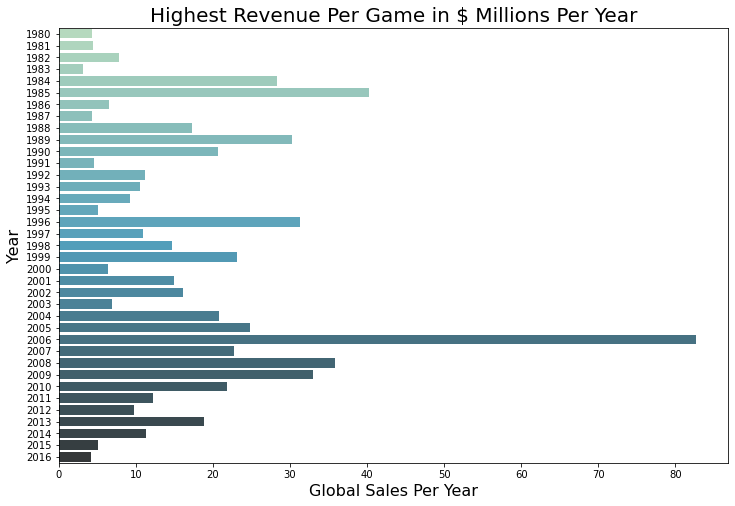

,Game,Global Sales
Year,,
1980,Asteroids,4.310
1981,Pitfall!,4.500
1982,Pac-Man,7.810
1983,Baseball,3.200
1984,Duck Hunt,28.310
1985,Super Mario Bros.,40.240
1986,The Legend of Zelda,6.510
1987,Zelda II: The Adventure of Link,4.380
1988,Super Mario Bros. 3,17.280


In [126]:
table = dataset.pivot_table('Global_Sales', index='Name', columns='Year')
table.columns = table.columns.astype(int)
games = table.idxmax()
sales = table.max()
years = table.columns
data = pd.concat([games, sales], axis=1)
data.columns = ['Game', 'Global Sales']


colors = sns.color_palette("GnBu_d", len(years))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = years , x = 'Global Sales', data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Global Sales Per Year', fontsize=16)
ax.set_ylabel(ylabel='Year', fontsize=16)
ax.set_title(label='Highest Revenue Per Game in $ Millions Per Year', fontsize=20)
plt.show();
data

---

Below, we check the publishers games releases. We do this in two steps.
1. We check the most 10 games releases to see if there is any unreasonable high number.
2. We check if the least 10 games publishers have any zero of negative or unreasonable values

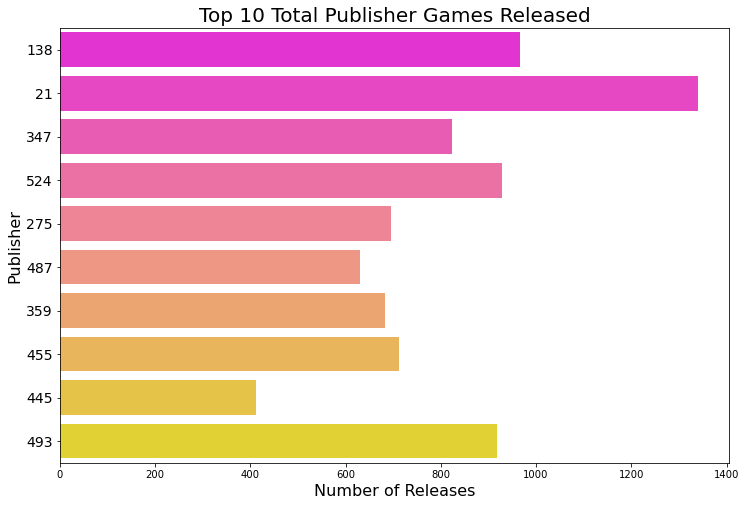

In [127]:
data = dataset.groupby(['Publisher']).count().iloc[:,0]
data = pd.DataFrame(data.sort_values(ascending=False))[:10]
publishers = data.index
data.columns = ['Releases']

colors = sns.color_palette("spring", len(data))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = publishers , x = 'Releases', data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Number of Releases', fontsize=16)
ax.set_ylabel(ylabel='Publisher', fontsize=16)
ax.set_title(label='Top 10 Total Publisher Games Released', fontsize=20)
ax.set_yticklabels(labels = publishers, fontsize=14)
plt.show();

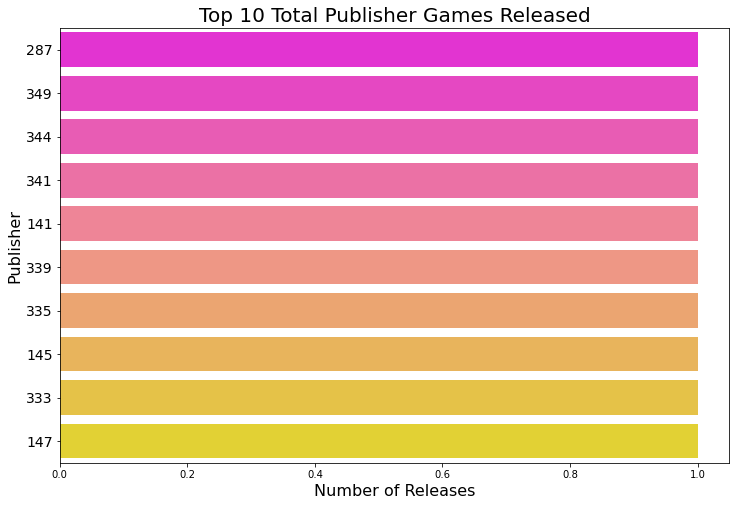

In [128]:
data = dataset.groupby(['Publisher']).count().iloc[:,0]
data = pd.DataFrame(data.sort_values(ascending=True))[:10]
publishers = data.index
data.columns = ['Releases']

colors = sns.color_palette("spring", len(data))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = publishers , x = 'Releases', data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Number of Releases', fontsize=16)
ax.set_ylabel(ylabel='Publisher', fontsize=16)
ax.set_title(label='Top 10 Total Publisher Games Released', fontsize=20)
ax.set_yticklabels(labels = publishers, fontsize=14)
plt.show();

It seems that numbers are quite sound. No publisher has any unreasonable value. 
We then continue our analysis

---

Finally, we check the heat map to get an insight about the correlation of the features.

In [129]:
## Defining the features and the dependent variable
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values
print(x[0])
print(y)

['Wii Sports' 26 2006.0 10 359 41.49 29.02 3.77 8.46]
[8.274e+01 4.024e+01 3.582e+01 ... 1.000e-02 1.000e-02 1.000e-02]


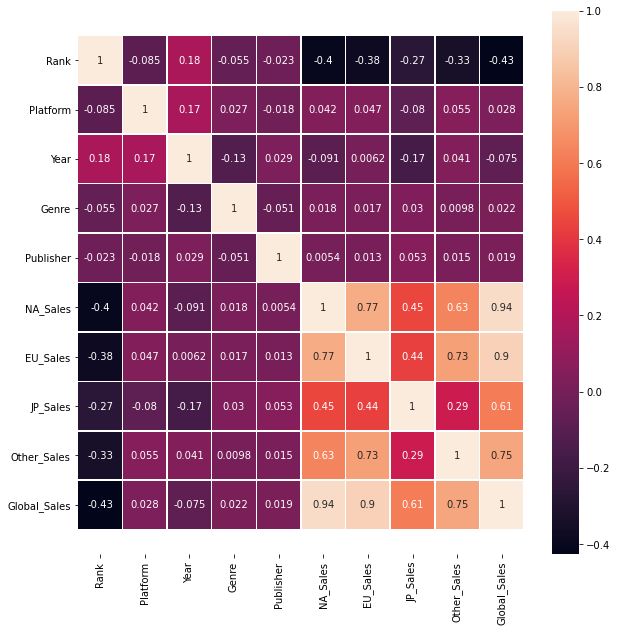

In [130]:
## Determining the relevancy of features using heatmap in calculating the outcome variable
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#Plotting heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,linewidths=.5)
b, t = plt.ylim() # Finding the values for bottom and top
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show() 

Retaining only the useful features of the dataset, we can decipher that the columns `NA_Sales`, `JP_Sales`, `EU_Sales` and `other_Sales` are the most useful features in determining the global sales from the heatmap

In [172]:
x = dataset.iloc[:,6:-1].values
print(x[0])

[41.49 29.02  3.77  8.46]


---

In [173]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(np.reshape(y_train,(len(y_train),1)))
y_test = sc_y.transform(np.reshape(y_test,(len(y_test),1)))

In [174]:
print(x_train)
print(x_test)
print(y_test)
print(y_train)

[[-0.32245605 -0.28380822 -0.0924089  -0.2463181 ]
 [-0.32245605 -0.26464499 -0.24818527 -0.2463181 ]
 [-0.27388072 -0.22631852 -0.24818527 -0.19574005]
 ...
 [-0.24959306 -0.20715529 -0.24818527 -0.19574005]
 [-0.24959306 -0.24548175 -0.24818527 -0.145162  ]
 [ 0.49118064 -0.26464499 -0.24818527  0.05715021]]
[[-0.20101773 -0.20715529 -0.24818527 -0.19574005]
 [ 1.21981051  0.52104753 -0.24818527  0.10772826]
 [ 0.15115337  0.0228035  -0.24818527 -0.145162  ]
 ...
 [-0.32245605 -0.28380822 -0.18587472 -0.2463181 ]
 [-0.29816838 -0.28380822 -0.24818527 -0.2463181 ]
 [-0.14029858 -0.28380822 -0.24818527 -0.19574005]]
[[-0.23907869]
 [ 0.76152761]
 [ 0.01732668]
 ...
 [-0.32663174]
 [-0.32663174]
 [-0.23907869]]
[[-0.30787037]
 [-0.33288553]
 [-0.289109  ]
 ...
 [-0.27034763]
 [-0.28285521]
 [ 0.1236411 ]]


Now that we have done alot of data preparation, investigation, and pre-processing, we Start training our models using different models with different parameters. But first, we split the data into train and test splits

In [175]:
## Splitting the dataset into independent and dependent vaiables
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [176]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[0.   0.   0.05 0.  ]
 [0.   0.01 0.   0.  ]
 [0.04 0.03 0.   0.01]
 ...
 [0.06 0.04 0.   0.01]
 [0.06 0.02 0.   0.02]
 [0.67 0.01 0.   0.06]]
[[0.1  0.04 0.   0.01]
 [1.27 0.42 0.   0.07]
 [0.39 0.16 0.   0.02]
 ...
 [0.   0.   0.02 0.  ]
 [0.02 0.   0.   0.  ]
 [0.15 0.   0.   0.01]]
[0.05 0.01 0.08 ... 0.11 0.09 0.74]
[0.16 1.76 0.57 ... 0.02 0.02 0.16]


---

Now, we start training using different models and different parameters. We'll store the R2 Score and the loss for comparison with other models or algorithms at the end of the notebook.

### Multiple Linear Regression

In [177]:
## Training the multiple linear regression on the training set
from sklearn.linear_model import LinearRegression
regressor_MultiLinear = LinearRegression()
regressor_MultiLinear.fit(x_train,y_train)

LinearRegression()

In [178]:
## Predicting test results
y_pred = regressor_MultiLinear.predict(x_test)

In [179]:
# Calculating r2 score
from sklearn.metrics import r2_score
r2_MultiLinear = r2_score(y_test,y_pred)
print(r2_MultiLinear)

0.99998698585513


In [180]:
from sklearn.metrics import mean_squared_error
mse_MultiLinear = mean_squared_error(y_test,y_pred)
print(mse_MultiLinear)

2.677398983414049e-05


----

### Polynomial Regression

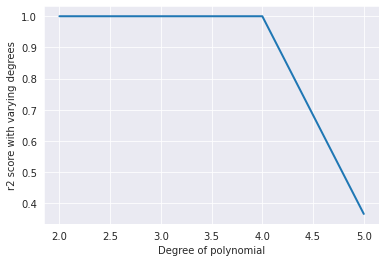

In [181]:
## Finding out the optimal degree of polynomial regression
from sklearn.preprocessing import PolynomialFeatures
sns.set_style('darkgrid')
scores_list = []
pRange = range(2,6)
for i in pRange :
    poly_reg = PolynomialFeatures(degree=i)
    x_poly = poly_reg.fit_transform(x_train)
    poly_regressor = LinearRegression()
    poly_regressor.fit(x_poly,y_train)
    y_pred = poly_regressor.predict(poly_reg.fit_transform(x_test))
    scores_list.append(r2_score(y_test,y_pred))
plt.plot(pRange,scores_list,linewidth=2)
plt.xlabel('Degree of polynomial')
plt.ylabel('r2 score with varying degrees')
plt.show()

In [182]:
## Training the polynomial regression on the training model
poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(x_train)
poly_regressor = LinearRegression()
poly_regressor.fit(x_poly,y_train)
y_pred = poly_regressor.predict(poly_reg.fit_transform(x_test))
r2_poly = r2_score(y_test,y_pred)
print(r2_poly)

0.9999869666165205


In [183]:
mse_regressor = mean_squared_error(y_test,y_pred)
print(mse_regressor)

2.6813569410063173e-05


---

### K-Nearest Neighbors Regression

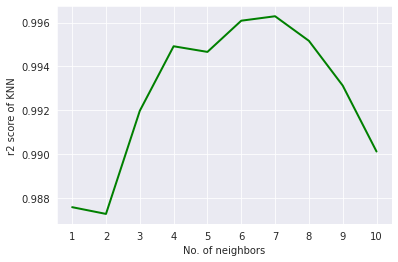

In [184]:
## Finding the optimal number of neighbors for KNN regression
from sklearn.neighbors import KNeighborsRegressor
knnRange = range(1,11,1)
scores_list = []
for i in knnRange:
    regressor_knn = KNeighborsRegressor(n_neighbors=i)
    regressor_knn.fit(x_train,y_train)
    y_pred = regressor_knn.predict(x_test)
    scores_list.append(r2_score(y_test,y_pred))
plt.plot(knnRange,scores_list,linewidth=2,color='green')
plt.xticks(knnRange)
plt.xlabel('No. of neighbors')
plt.ylabel('r2 score of KNN')
plt.show()    

In [185]:
# Training the KNN model on the training set
regressor_knn = KNeighborsRegressor(n_neighbors=7)
regressor_knn.fit(x_train,y_train)
y_pred = regressor_knn.predict(x_test)
r2_knn = r2_score(y_test,y_pred)
print(r2_knn)

0.9962866140312201


In [186]:
mse_knn = mean_squared_error(y_test,y_pred)
print(mse_knn)

0.007639545984139509


---

### Linear Support Vector Regression

In [187]:
## Training the Linear SVR model on the training set
from sklearn.svm import SVR
regressor_SVR = SVR(kernel='linear')
regressor_SVR.fit(x_train,y_train)

SVR(kernel='linear')

In [188]:
## Predicting test results
y_pred = regressor_SVR.predict(x_test)

In [189]:
## Calculating r2 score
r2_linearSVR = r2_score(y_test,y_pred)
print(r2_linearSVR)

0.9968163103604051


In [190]:
mse_svr = mean_squared_error(y_test,y_pred)
print(mse_svr)

0.006549802149682072


---

### Non-linear Support Vector Regression

In [191]:
## Training the Non-linear SVR model on the training set
from sklearn.svm import SVR
regressor_NonLinearSVR = SVR(kernel='rbf')
regressor_NonLinearSVR.fit(x_train,y_train)

SVR()

In [192]:
## Predicting test results
y_pred = regressor_NonLinearSVR.predict(x_test)

In [193]:
## Calculating r2 score
r2_NonlinearSVR = r2_score(y_test,y_pred)
print(r2_NonlinearSVR)

0.7449832467235064


In [194]:
mse_nlsvr = mean_squared_error(y_test,y_pred)
print(mse_nlsvr)

0.5246457625900485


We Also add some intersting models that are not in our syllabus **only for the sake of comparison**

### Decision Tree Regression

In [195]:
# Training the Decision Tree regression on the training model
from sklearn.tree import DecisionTreeRegressor
regressor_Tree = DecisionTreeRegressor(random_state=0)
regressor_Tree.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [196]:
# Predicting test results
y_pred = regressor_Tree.predict(x_test)

In [197]:
# Calculating r2 score
r2_tree = r2_score(y_test,y_pred)
print(r2_tree)

0.9565662626204867


In [198]:
mse_tree = mean_squared_error(y_test,y_pred)
print(mse_tree)

0.08935619317882311


---

### Random Forest Regression

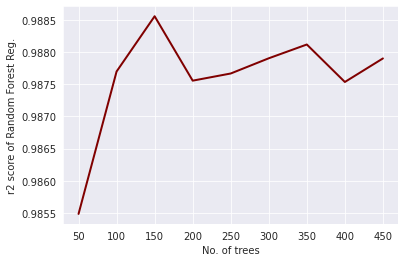

In [199]:
# Finding out the optimal number of trees for Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
forestRange=range(50,500,50)
scores_list=[]
for i in forestRange: 
    regressor_Forest = RandomForestRegressor(n_estimators=i,random_state=0)
    regressor_Forest.fit(x_train,y_train)
    y_pred = regressor_Forest.predict(x_test)
    scores_list.append(r2_score(y_test,y_pred))
plt.plot(forestRange,scores_list,linewidth=2,color='maroon')
plt.xticks(forestRange)
plt.xlabel('No. of trees')
plt.ylabel('r2 score of Random Forest Reg.')
plt.show()    

In [200]:
# Training the Random Forest regression on the training model
regressor_Forest = RandomForestRegressor(n_estimators=100,random_state=0)
regressor_Forest.fit(x_train,y_train)
y_pred = regressor_Forest.predict(x_test)
r2_forest = r2_score(y_test,y_pred)
print(r2_forest)

0.9876979895808436


In [201]:
mse_rforest = mean_squared_error(y_test,y_pred)
print(mse_rforest)

0.025308916197953762


---

In [202]:
## Applying XGBoost Regression model on the training set
from xgboost import XGBRegressor
regressor_xgb = XGBRegressor()
regressor_xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [203]:
## Predicting test results
y_pred = regressor_xgb.predict(x_test)

In [205]:
## Calculating r2 score
r2_xgb = r2_score(y_test,y_pred)
print(r2_xgb)

0.982996334738089


In [206]:
mse_xgb =  mean_squared_error(y_test,y_pred)
print(mse_xgb)

0.03498162694624625


---

In [207]:
## Comparing the r2 scores of different models
labelList = ['Multiple Linear Reg.','Polynomial Reg.','K-NearestNeighbors','Decision Tree','Random Forest',
             'Linear SVR','Non-Linear SVR','XGBoost Reg.']
mylist = [r2_MultiLinear,r2_poly,r2_knn,r2_tree,r2_forest,r2_linearSVR,r2_NonlinearSVR,r2_xgb]
for i in range(0,len(mylist)):
    mylist[i]=np.round(mylist[i]*100,decimals=3)
print(mylist)

[99.999, 99.999, 99.629, 95.657, 98.77, 99.682, 74.498, 98.3]


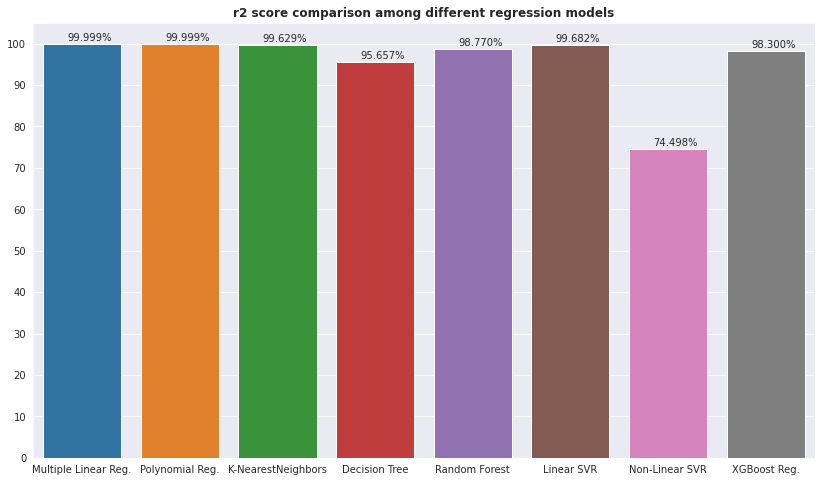

In [208]:
plt.figure(figsize=(14,8))
ax = sns.barplot(x=labelList,y=mylist)
plt.yticks(np.arange(0, 101, step=10))
plt.title('r2 score comparison among different regression models',fontweight='bold')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.3f}%'.format(height), (x +0.25, y + height + 0.8))
plt.show()

In [213]:
## Comparing the r2 scores of different models
labelList = ['Multiple Linear Reg.','Polynomial Reg.','K-NearestNeighbors','Decision Tree','Random Forest',
             'Linear SVR','Non-Linear SVR','XGBoost Reg.']
mylist = [mse_MultiLinear,mse_regressor,mse_knn,mse_tree,mse_rforest,mse_svr,mse_nlsvr,mse_xgb]
for i in range(0,len(mylist)):
    mylist[i]=np.round(mylist[i]*100,decimals=3)
print(mylist)

[0.003, 0.003, 0.764, 8.936, 2.531, 0.655, 52.465, 3.498]


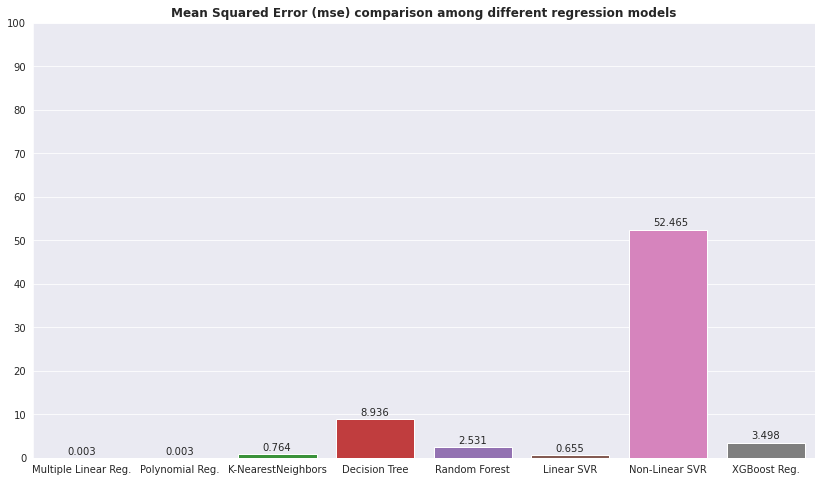

In [216]:
plt.figure(figsize=(14,8))
ax = sns.barplot(x=labelList,y=mylist)
plt.yticks(np.arange(0, 101, step=10))
plt.title('Mean Squared Error (mse) comparison among different regression models',fontweight='bold')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.3f}'.format(height), (x +0.25, y + height + 0.8))
plt.show()

---